In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv("/content/drive/MyDrive/bank.csv")

In [3]:
# first 5 rows in the dataframe
customer_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
# finding the number of rows and columns
customer_data.shape

(100000, 28)

In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

In [6]:
df = customer_data.copy()

In [7]:
# checking for missing values
customer_data.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [8]:
df1 = df[['Age','Occupation','Annual_Income','Outstanding_Debt','Delay_from_due_date','Credit_Score','Payment_Behaviour']]

In [9]:
numeric_columns = df1.select_dtypes(include=['int64','float64']).columns
categorical_columns = df1.select_dtypes(include=['object']).columns
print(numeric_columns)
print(categorical_columns)

Index(['Age', 'Annual_Income', 'Outstanding_Debt', 'Delay_from_due_date'], dtype='object')
Index(['Occupation', 'Credit_Score', 'Payment_Behaviour'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_columns:
    df1[col] = LabelEncoder().fit_transform(df1[col])
df1[categorical_columns]

<ipython-input-16-cdfb1481319f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = LabelEncoder().fit_transform(df1[col])
<ipython-input-16-cdfb1481319f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col] = LabelEncoder().fit_transform(df1[col])
<ipython-input-16-cdfb1481319f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Occupation,Credit_Score,Payment_Behaviour
0,12,0,2
1,12,0,3
2,12,0,4
3,12,0,5
4,12,0,1
...,...,...,...
99995,9,1,0
99996,9,1,1
99997,9,1,0
99998,9,2,3


In [ ]:
df1.head(5)

,Age,Occupation,Annual_Income,Outstanding_Debt,Delay_from_due_date,Credit_Score,Payment_Behaviour
0,23,12,19114.12,809.98,3,0,2
1,23,12,19114.12,809.98,3,0,3
2,23,12,19114.12,809.98,3,0,4
3,23,12,19114.12,809.98,5,0,5
4,23,12,19114.12,809.98,6,0,1


In [ ]:
X = df1.values

In [ ]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

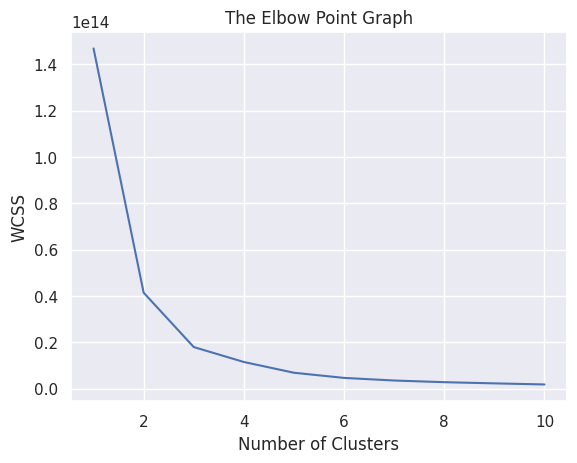

In [ ]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 1 1 1]


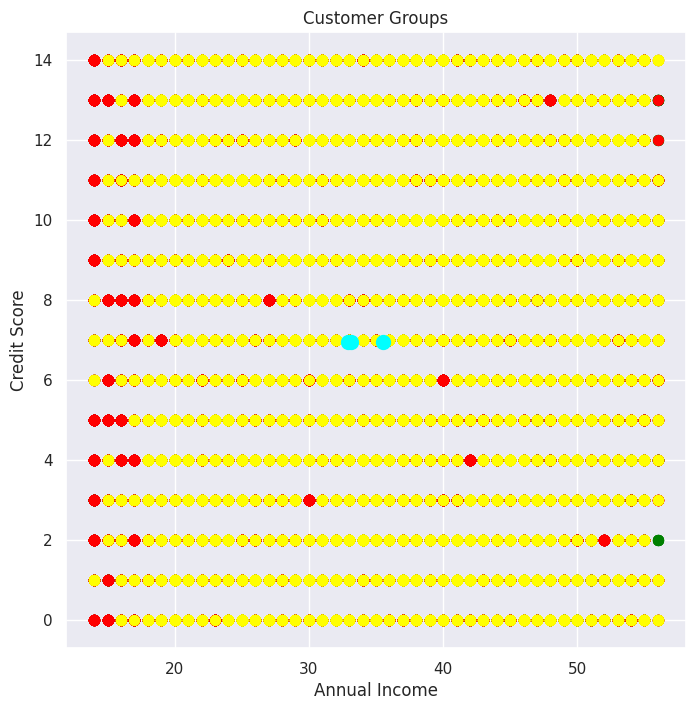

In [ ]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Credit Score')
plt.show()

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
cluster_val = pd.Series(Y)

In [ ]:
cluster_val.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
dtype: int32

In [ ]:
df['cluster'] = cluster_val

In [ ]:
df.head(50)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,cluster
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,26.822620,265,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good,1
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,31.944960,266,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629163,Good,1
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,28.609352,267,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good,1
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,31.377862,268,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good,1
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,24.797347,269,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good,1
5,5639,3392,6,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,27.262259,270,No,49.574949,21.465380,High_spent_Medium_value_payments,340.479212,Good,1
6,5640,3392,7,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,22.537593,271,No,49.574949,21.465380,Low_spent_Small_value_payments,244.565317,Good,1
7,5641,3392,8,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,809.98,23.933795,272,No,49.574949,21.465380,High_spent_Medium_value_payments,358.124168,Standard,1
8,5646,8625,1,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,605.03,24.464031,319,No,18.816215,39.684018,Low_spent_Small_value_payments,470.690627,Standard,1
9,5647,8625,2,Rick Rothackerj,28,4075839,Teacher,34847.84,3037.986667,2,...,605.03,38.550848,320,No,18.816215,39.684018,High_spent_Large_value_payments,484.591214,Good,1


In [ ]:
df.to_csv('Bank_cluster1')

In [ ]:
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [10]:
dfr = df.copy()

In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    dfr[column] = label_encoder.fit_transform(dfr[column])

In [12]:
#Drop columns
print("Size of Dataset before dropping columns : ",dfr.shape)
drop_columns = ['ID','Customer_ID','Name','SSN']
dfr.drop(drop_columns,axis=1,inplace=True)
print("Size of Dataset after dropping columns : ",dfr.shape)

Size of Dataset before dropping columns :  (100000, 28)
Size of Dataset after dropping columns :  (100000, 24)


In [13]:
#Spli Input & Output Data
X = dfr.drop('Credit_Score',axis=1)
y = dfr['Credit_Score']
print(X.shape)
print(y.shape)

(100000, 23)
(100000,)


In [14]:
#Normalize Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [15]:
#Split Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 23)
(20000, 23)
(80000,)
(20000,)


In [26]:
#Method to evaluate the performance of the model
def evaluate_model(y_test,y_pred):
    print("Classification Report")
    print(classification_report(y_test, y_pred))

    print("\n---------------------------------------------\n")
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap of the confusion matrix using Seaborn
    sns.heatmap(cm, annot=True, cmap='Greens',fmt='.0f')

    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')

    plt.show()

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score,classification_report,confusion_matrix

In [18]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.4 MB/s eta 0:00:00


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings, re, joblib
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier, SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, HistGradientBoostingClassifier, BaggingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from scipy.stats import probplot
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest, SelectPercentile, SelectFromModel, f_classif
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, PowerTransformer, FunctionTransformer, OneHotEncoder, LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, precision_score, recall_score, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
# List of classifiers to test
classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier(n_neighbors=5)),
    ('Gaussion NB',GaussianNB()),
    ('XGB',xgb.XGBClassifier())
]

# Iterate over each classifier and evaluate performance
for clf_name, clf in classifiers:
    # Perform cross-validation
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    # Calculate average performance metrics
    avg_accuracy = scores.mean()
    avg_precision = cross_val_score(clf, X_train, y_train, cv=5, scoring='precision_macro').mean()
    avg_recall = cross_val_score(clf, X_train, y_train, cv=5, scoring='recall_macro').mean()

    # Print the performance metrics
    print(f'Classifier: {clf_name}')
    print(f'Average Accuracy: {avg_accuracy:.4f}')
    print(f'Average Precision: {avg_precision:.4f}')
    print(f'Average Recall: {avg_recall:.4f}')
    print('-----------------------')

Classifier: Decision Tree
Average Accuracy: 0.7375
Average Precision: 0.7214
Average Recall: 0.7199
-----------------------
Classifier: Random Forest
Average Accuracy: 0.8229
Average Precision: 0.8148
Average Recall: 0.8182
-----------------------
Classifier: KNN
Average Accuracy: 0.7108
Average Precision: 0.6849
Average Recall: 0.6943
-----------------------
Classifier: Gaussion NB
Average Accuracy: 0.6370
Average Precision: 0.6312
Average Recall: 0.6867
-----------------------
Classifier: XGB
Average Accuracy: 0.7809
Average Precision: 0.7664
Average Recall: 0.7720
-----------------------


Classification Report
              precision    recall  f1-score   support

           0       0.79      0.82      0.81      3566
           1       0.82      0.86      0.84      5799
           2       0.86      0.83      0.84     10635

    accuracy                           0.84     20000
   macro avg       0.83      0.84      0.83     20000
weighted avg       0.84      0.84      0.84     20000


---------------------------------------------



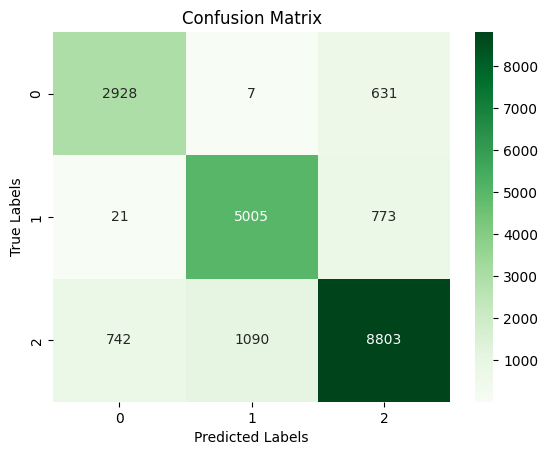

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [ ]:
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Credit_Score
0    53174
2    53174
1    53174
Name: count, dtype: int64

In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127617, 23)
(31905, 23)
(127617,)
(31905,)


Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.92     10635
           1       0.88      0.92      0.90     10635
           2       0.90      0.80      0.84     10635

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.89      0.89      0.89     31905


---------------------------------------------



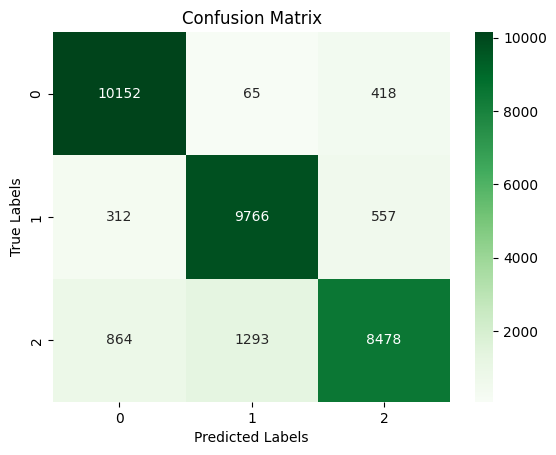

In [ ]:
# Creating the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred)

In [ ]:
df3=df.copy()

In [ ]:
drop_columns = ['ID','Customer_ID','Name','SSN']
df3.drop(drop_columns,axis=1,inplace=True)

In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Occupation','Type_of_Loan','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score']
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and apply label encoding
for column in categorical_columns:
    df3[column] = label_encoder.fit_transform(df3[column])

In [ ]:
X=df3.drop('Credit_Score',axis=1)
y = df3.Credit_Score

In [ ]:
X.columns

Index(['Month', 'Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [ ]:
X, y = smote.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,shuffle=True,random_state=42)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = StandardScaler()
features = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train,columns=features)
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test,columns=features)
X_train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.303428,-1.085352,0.490590,-0.806140,-0.836102,-0.400929,-0.165448,0.581930,0.665374,0.987801,...,-0.139234,1.161036,0.013179,-1.433548,-0.462996,-1.822152,-0.362946,-0.791876,1.346447,-0.378175
1,1.237435,-1.085352,1.665230,2.319130,2.303824,-1.145969,0.767735,-1.434379,-0.163075,0.499664,...,0.894861,-0.166403,-0.114287,-0.695179,0.510263,-0.406984,1.323037,2.270356,-0.885706,2.392646
2,-1.097582,1.329910,1.665230,2.988148,2.965573,-1.891008,-0.165448,-0.650259,0.251149,-1.562145,...,-1.431852,-0.166403,-0.878004,0.429107,1.605179,-0.406984,2.507998,1.474831,0.788409,-0.158558
3,-1.564585,-0.342194,0.490590,0.531200,0.454894,-1.518488,-0.165448,-0.986310,0.251149,0.604810,...,-1.431852,-0.166403,-1.059489,0.519477,-0.412306,-0.406984,0.746382,1.612317,-0.327668,0.457214
4,1.704438,-0.713773,-0.214194,0.212657,0.152289,0.344110,0.301144,1.590084,1.908047,-0.489535,...,1.928956,-1.493843,3.082577,0.587619,-2.085095,-1.822152,1.212101,0.634199,0.788409,-1.832906


In [ ]:
model_names = []
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
def train_and_evaluate_model(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    acc = accuracy_score(y_test,y_pred)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    print("Train Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    precision = precision_score(y_test,y_pred,average='micro')
    recall = recall_score(y_test,y_pred,average='micro')
    f1 = f1_score(y_test,y_pred,average='micro')
    ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
    plt.show();
    model_names.append(model)
    accuracy_scores.append(acc)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77     17491
           1       0.74      0.65      0.69     17613
           2       0.67      0.58      0.62     17539

    accuracy                           0.70     52643
   macro avg       0.70      0.70      0.70     52643
weighted avg       0.70      0.70      0.70     52643

Train Accuracy: 0.7025234143283526
Test Accuracy: 0.6995801910985316


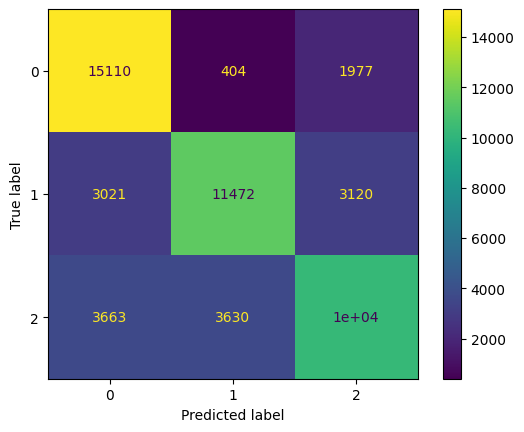

In [ ]:
train_and_evaluate_model(RidgeClassifier())

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     17491
           1       0.80      0.81      0.80     17613
           2       0.73      0.71      0.72     17539

    accuracy                           0.79     52643
   macro avg       0.79      0.79      0.79     52643
weighted avg       0.79      0.79      0.79     52643

Train Accuracy: 1.0
Test Accuracy: 0.7913492772068461


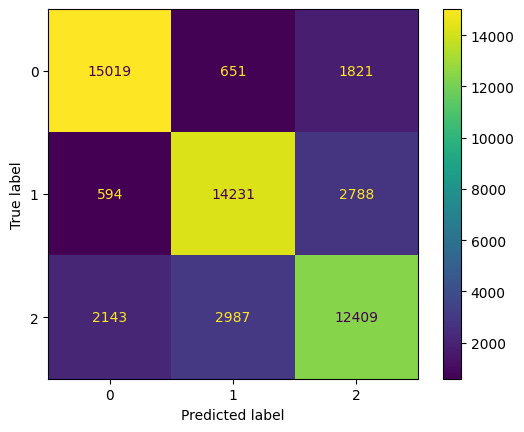

In [ ]:
train_and_evaluate_model(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.73      0.89      0.80     17491
           1       0.79      0.77      0.78     17613
           2       0.76      0.62      0.68     17539

    accuracy                           0.76     52643
   macro avg       0.76      0.76      0.75     52643
weighted avg       0.76      0.76      0.75     52643

Train Accuracy: 0.7669794814696994
Test Accuracy: 0.7573276598978022


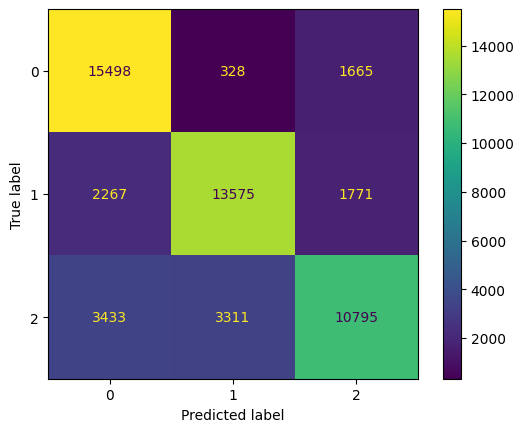

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
train_and_evaluate_model(svm_model)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77     17491
           1       0.74      0.65      0.69     17613
           2       0.67      0.59      0.63     17539

    accuracy                           0.70     52643
   macro avg       0.70      0.70      0.70     52643
weighted avg       0.70      0.70      0.70     52643

Train Accuracy: 0.7052741885683811
Test Accuracy: 0.7011378530858804


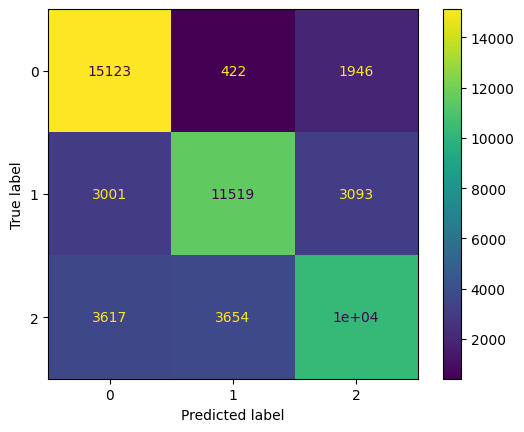

In [ ]:
train_and_evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     17491
           1       0.88      0.93      0.90     17613
           2       0.89      0.77      0.82     17539

    accuracy                           0.88     52643
   macro avg       0.88      0.88      0.88     52643
weighted avg       0.88      0.88      0.88     52643

Train Accuracy: 0.9999906436250339
Test Accuracy: 0.8831373591930551


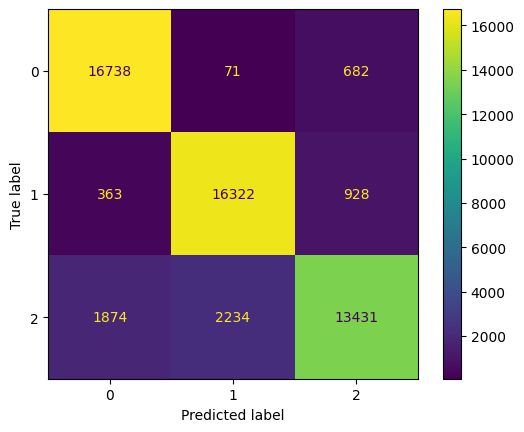

In [ ]:
train_and_evaluate_model(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     17491
           1       0.89      0.93      0.91     17613
           2       0.90      0.79      0.84     17539

    accuracy                           0.89     52643
   macro avg       0.89      0.89      0.89     52643
weighted avg       0.89      0.89      0.89     52643

Train Accuracy: 1.0
Test Accuracy: 0.8927112816518815


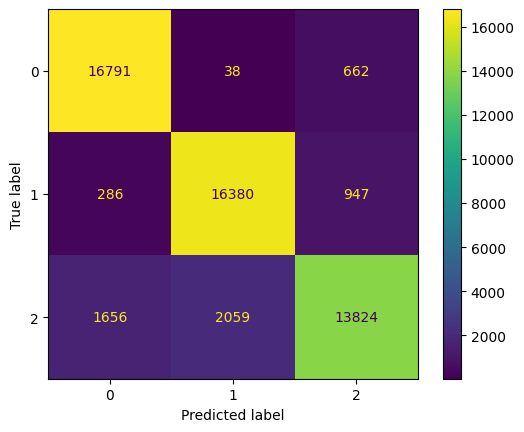

In [ ]:
train_and_evaluate_model(ExtraTreesClassifier())

In [ ]:
train_and_evaluate_model(GradientBoostingClassifier())

              precision    recall  f1-score   support

           0       0.74      0.87      0.80     17491
           1       0.78      0.76      0.77     17613
           2       0.74      0.62      0.68     17539

    accuracy                           0.75     52643
   macro avg       0.75      0.75      0.75     52643
weighted avg       0.75      0.75      0.75     52643



Learning rate set to 0.100415
0:	learn: 1.0241027	total: 133ms	remaining: 2m 13s
1:	learn: 0.9660976	total: 217ms	remaining: 1m 48s
2:	learn: 0.9197113	total: 295ms	remaining: 1m 38s
3:	learn: 0.8820305	total: 374ms	remaining: 1m 33s
4:	learn: 0.8496502	total: 452ms	remaining: 1m 29s
5:	learn: 0.8235948	total: 531ms	remaining: 1m 27s
6:	learn: 0.8016289	total: 605ms	remaining: 1m 25s
7:	learn: 0.7820058	total: 686ms	remaining: 1m 25s
8:	learn: 0.7659223	total: 761ms	remaining: 1m 23s
9:	learn: 0.7520165	total: 840ms	remaining: 1m 23s
10:	learn: 0.7400590	total: 931ms	remaining: 1m 23s
11:	learn: 0.7295477	total: 1s	remaining: 1m 22s
12:	learn: 0.7200565	total: 1.08s	remaining: 1m 21s
13:	learn: 0.7118399	total: 1.14s	remaining: 1m 20s
14:	learn: 0.7040995	total: 1.21s	remaining: 1m 19s
15:	learn: 0.6972632	total: 1.28s	remaining: 1m 18s
16:	learn: 0.6912898	total: 1.39s	remaining: 1m 20s
17:	learn: 0.6863983	total: 1.51s	remaining: 1m 22s
18:	learn: 0.6816892	total: 1.65s	remaining: 1m

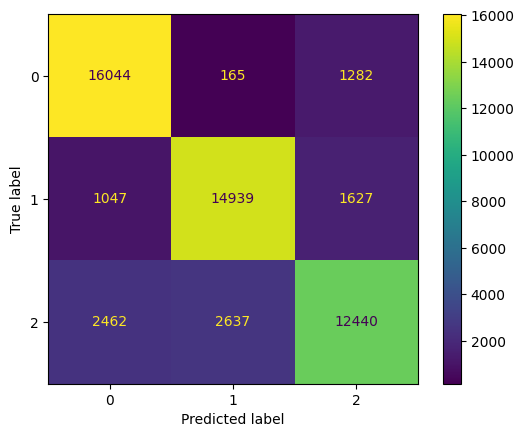

In [ ]:
train_and_evaluate_model(CatBoostClassifier())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2812
[LightGBM] [Info] Number of data points in the train set: 106879, number of used features: 23
[LightGBM] [Info] Start training from score -1.097023
[LightGBM] [Info] Start training from score -1.100448
[LightGBM] [Info] Start training from score -1.098369
              precision    recall  f1-score   support

           0       0.78      0.90      0.83     17491
           1       0.80      0.81      0.81     17613
           2       0.78      0.66      0.71     17539

    accuracy                           0.79     52643
   macro avg       0.79      0.79      0.78     52643
weighted avg       0.79      0.79      0.78     52643

Train Accuracy: 0.8024401425911545
Test Accuracy: 0.7875501016279467


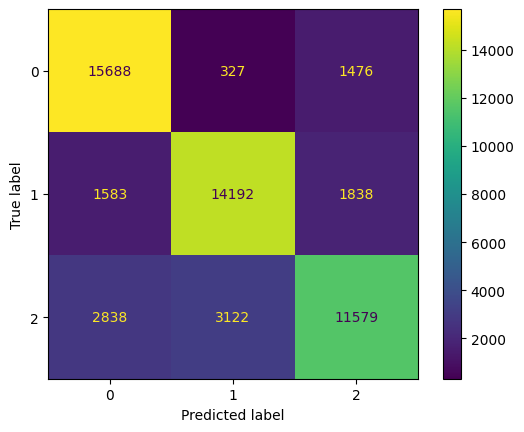

In [ ]:
train_and_evaluate_model(LGBMClassifier())

              precision    recall  f1-score   support

           0       0.71      0.85      0.77     17491
           1       0.74      0.66      0.70     17613
           2       0.66      0.59      0.62     17539

    accuracy                           0.70     52643
   macro avg       0.70      0.70      0.70     52643
weighted avg       0.70      0.70      0.70     52643

Train Accuracy: 0.7054238905678384
Test Accuracy: 0.700435005603784


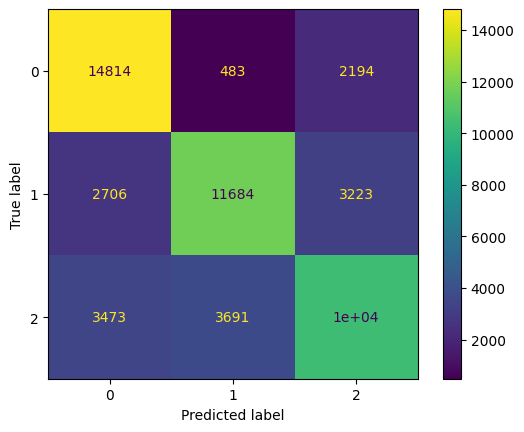

In [ ]:
train_and_evaluate_model(LogisticRegression())

              precision    recall  f1-score   support

           0       0.83      0.92      0.87     17491
           1       0.84      0.86      0.85     17613
           2       0.82      0.71      0.76     17539

    accuracy                           0.83     52643
   macro avg       0.83      0.83      0.83     52643
weighted avg       0.83      0.83      0.83     52643

Train Accuracy: 0.8654833971126227
Test Accuracy: 0.8293600288737344


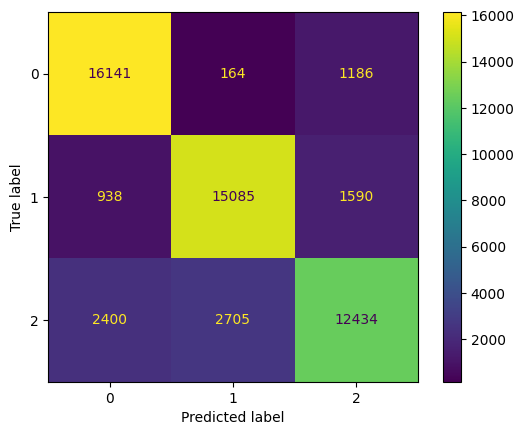

In [ ]:
train_and_evaluate_model(XGBClassifier())

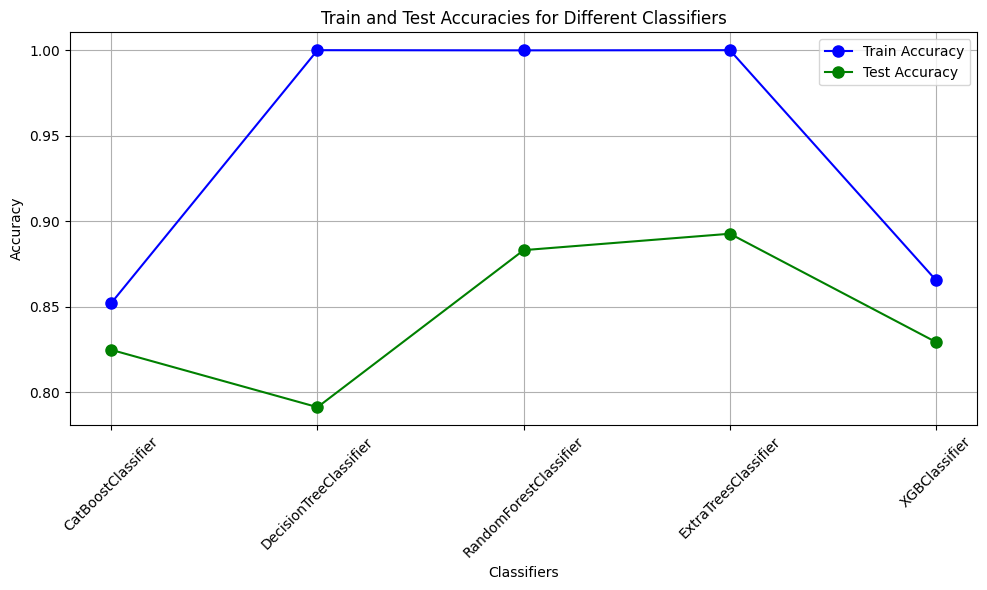

In [22]:
classifiers = ['CatBoostClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'ExtraTreesClassifier', 'XGBClassifier']
train_accuracies = [0.85223, 1.0, 0.9999, 1.0, 0.86548]
test_accuracies = [0.82485, 0.79134, 0.88313, 0.89271, 0.82936]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(classifiers, train_accuracies, marker='o', label='Train Accuracy', linestyle='-', color='b', markersize=8)
plt.plot(classifiers, test_accuracies, marker='o', label='Test Accuracy', linestyle='-', color='g', markersize=8)

# Add labels and legend
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Train and Test Accuracies for Different Classifiers')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
#Handle Imbalance Data
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Credit_Score
0    53174
2    53174
1    53174
Name: count, dtype: int64

In [24]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(127617, 23)
(31905, 23)
(127617,)
(31905,)


Classification Report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     10635
           1       0.88      0.92      0.90     10635
           2       0.90      0.80      0.84     10635

    accuracy                           0.89     31905
   macro avg       0.89      0.89      0.89     31905
weighted avg       0.89      0.89      0.89     31905


---------------------------------------------



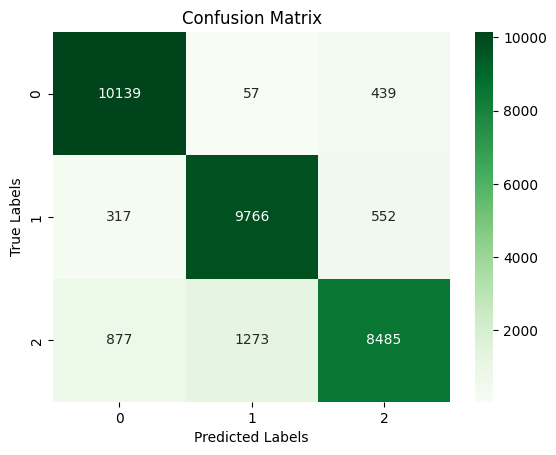

In [27]:
# Creating the Random Forest classifier
rf1_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier
rf1_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred1 = rf1_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.96      0.93     10635
           1       0.89      0.92      0.91     10635
           2       0.89      0.81      0.85     10635

    accuracy                           0.90     31905
   macro avg       0.90      0.90      0.89     31905
weighted avg       0.90      0.90      0.89     31905


---------------------------------------------



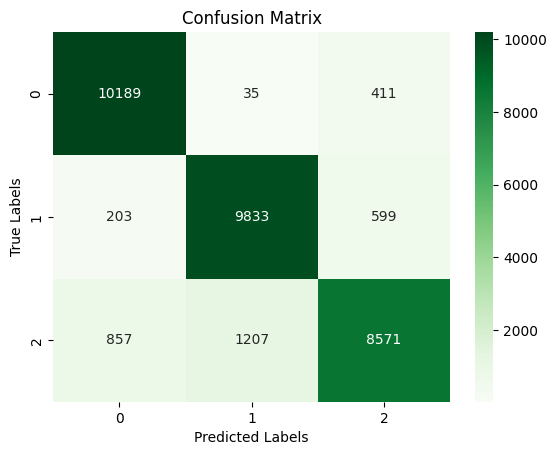

In [28]:
# Creating the Extra Trees classifier
ext_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Training the classifier
ext_classifier.fit(X_train, y_train)

# Making predictions on the test set
y_pred2 = ext_classifier.predict(X_test)

# Evaluating the model
evaluate_model(y_test, y_pred2)